In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import nltk, re, string, collections
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/boston/calendar.csv
/kaggle/input/boston/listings.csv
/kaggle/input/boston/reviews.csv


### 5 questions:
#### 1. Question 1. Distributions of Price and Review scores in Listing dataset
#### 2. Question 2: Correlations between Price and other Features
#### 3. Question 3: Model formulation to predict Price using Linear Regression Algorithm
#### 4. Question 4: The most frequent n_grams in Review dataset's comments
#### 5. Question 5: Distribution of Price, Listing Supply and Listing Demand

## 1. Importing datasets

In [2]:
# Read CSV files
calendar_df = pd.read_csv("/kaggle/input/boston/calendar.csv")
listing_df = pd.read_csv("/kaggle/input/boston/listings.csv")
review_df = pd.read_csv("/kaggle/input/boston/reviews.csv")

## 2. Data Understanding

### 2.1. Calendar

In [3]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [4]:
calendar_df.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


### 2.2. Listing

In [5]:
listing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [6]:
pd.set_option('display.max_columns', None) #This helps all column names be displayed
listing_df.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

### 2.3. Review

In [7]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     68275 non-null  int64 
 1   id             68275 non-null  int64 
 2   date           68275 non-null  object
 3   reviewer_id    68275 non-null  int64 
 4   reviewer_name  68275 non-null  object
 5   comments       68222 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


In [8]:
review_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


## 3. Data wrangling

In [9]:
# Drop the duplicates in the datasets
calendar_df.drop_duplicates(keep=False,inplace=True)
listing_df.drop_duplicates(keep=False,inplace=True)
review_df.drop_duplicates(keep=False,inplace=True)

In [10]:
# Check null values in the datasets
calendar_df_nulls = set(calendar_df.columns[calendar_df.isnull().any()])
listing_df_nulls = set(listing_df.columns[listing_df.isnull().any()])
review_df_nulls = set(review_df.columns[review_df.isnull().any()])
print ("the columns having null values in calendar_df is: ", calendar_df_nulls)
print ("the columns having null values in listing_df is: ", listing_df_nulls)
print ("the columns having null values in review_df is: ", review_df_nulls)

the columns having null values in calendar_df is:  {'price'}
the columns having null values in listing_df is:  {'review_scores_communication', 'cleaning_fee', 'transit', 'house_rules', 'neighbourhood_group_cleansed', 'first_review', 'monthly_price', 'neighborhood_overview', 'beds', 'security_deposit', 'review_scores_value', 'license', 'reviews_per_month', 'notes', 'thumbnail_url', 'has_availability', 'zipcode', 'review_scores_checkin', 'medium_url', 'host_about', 'host_location', 'access', 'market', 'bedrooms', 'square_feet', 'interaction', 'host_response_time', 'neighbourhood', 'jurisdiction_names', 'last_review', 'review_scores_accuracy', 'host_response_rate', 'summary', 'host_acceptance_rate', 'property_type', 'review_scores_cleanliness', 'xl_picture_url', 'weekly_price', 'review_scores_location', 'review_scores_rating', 'space', 'city', 'bathrooms', 'host_neighbourhood'}
the columns having null values in review_df is:  {'comments'}


In [11]:
# Filter the calendar when the listings were available
avail_calendar = calendar_df[calendar_df.available == "t"]
avail_calendar_nulls = set(avail_calendar.columns[avail_calendar.isnull().any()])
print ("the columns having null values in avail_calendar is: ", avail_calendar_nulls)

the columns having null values in avail_calendar is:  set()


In [12]:
# Ignore warnings
warnings.filterwarnings("ignore")

# Convert to datetime value
avail_calendar["date"] = pd.to_datetime(avail_calendar["date"]) 

# Create a function to cleanse price values
price_w = lambda x : (x.replace('.00','').replace('$','').replace(',','')) 

# Use the function
avail_calendar.price = avail_calendar.price.apply(price_w)

# Convert the "price" value to numeric
avail_calendar.price = pd.to_numeric(avail_calendar.price)

#A quick look at the top results
avail_calendar.head(10) 

,listing_id,date,available,price
365,3075044,2017-08-22,t,65
366,3075044,2017-08-21,t,65
367,3075044,2017-08-20,t,65
368,3075044,2017-08-19,t,75
369,3075044,2017-08-18,t,75
370,3075044,2017-08-17,t,65
371,3075044,2017-08-16,t,65
372,3075044,2017-08-15,t,65
373,3075044,2017-08-14,t,65
374,3075044,2017-08-13,t,65


In [13]:
# Use the price_w function to price values in listing dataframe
listing_df.price = listing_df.price.apply(price_w) 

# Convert the "price" value to numeric
listing_df.price = pd.to_numeric(listing_df.price)

# A quick look at the top results
listing_df.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,250,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United States"

In [14]:
# Convert to datetime value
calendar_df["date"] = pd.to_datetime(calendar_df["date"])

# Sort the data by date
calendar_df = calendar_df.sort_values(by = "date")

# Find the first and the last day in the data set
start = calendar_df["date"].min()
end = calendar_df["date"].max()
print("The calendar dataset is for", end - start, "; from",start,"to", end)


The calendar dataset is for 364 days 00:00:00 ; from 2016-09-06 00:00:00 to 2017-09-05 00:00:00


In [15]:
# Convert to datetime value
review_df["date"] = pd.to_datetime(review_df["date"]) 

# Sort the data by date
review_df = review_df.sort_values(by = "date")

# Find the first and the last day in the data set
start = review_df["date"].min()
end = review_df["date"].max()
print("The review dataset is for", end - start, "; from",start,"to", end)

The review dataset is for 2726 days 00:00:00 ; from 2009-03-21 00:00:00 to 2016-09-06 00:00:00


In [16]:
# A quick look at the top results
review_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
8545,5506,1021,2009-03-21,8903,Jenny,Terry's Hotel Alterntv in Boston was a perfect...
27026,3353,1749,2009-04-23,12970,Clint,Very friendly and helpful. Convenient location.
8546,5506,1953,2009-05-01,12970,Clint,Warm and accommodating host. Beautiful and wel...
57563,6976,5808,2009-07-19,23549,Gary,"A Wonderful, pleasant, and charming host. The..."
20565,6695,6826,2009-08-06,25094,Jaelen,Terry's apartment is beautifully decorated and...


## 4. Modelling and Results

## Question 1: Distributions of Prices and Review scores in Listing dataset

In [17]:
# Select important columns
cols = ["id", "price", "summary", "host_response_time", "host_response_rate", "property_type", "accommodates", "bathrooms", "bedrooms","beds", "review_scores_value", "review_scores_accuracy", "review_scores_rating", "review_scores_cleanliness", "review_scores_communication", "review_scores_location"]
listing_1 = listing_df[cols]
listing_1.head()

,id,price,summary,host_response_time,host_response_rate,property_type,accommodates,bathrooms,bedrooms,beds,review_scores_value,review_scores_accuracy,review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_location
0,12147973,250,"Cozy, sunny, family home. Master bedroom high...",NaN,NaN,House,4,1.5,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
1,3075044,65,Charming and quiet room in a second floor 1910...,within an hour,100%,Apartment,2,1.0,1.0,1.0,9.0,10.0,94.0,9.0,10.0,9.0
2,6976,65,"Come stay with a friendly, middle-aged guy in ...",within a few hours,100%,Apartment,2,1.0,1.0,1.0,10.0,10.0,98.0,9.0,10.0,9.0
3,1436513,75,Come experience the comforts of home away from...,within a few hours,100%,House,4,1.0,1.0,2.0,10.0,10.0,100.0,10.0,10.0,10.0
4,7651065,79,"My comfy, clean and relaxing home is one block...",within an hour,100%,House,2,1.5,1.0,2.0,10.0,10.0,99.0,10.0,10.0,9.0


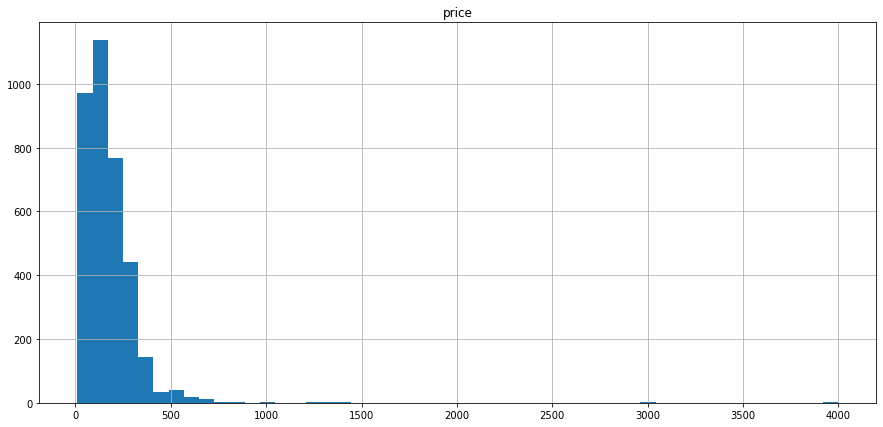

In [18]:
# Plot the histogram of Price
listing_1.hist(column = "price", bins = 50, figsize = (15, 7) )
plt.show()

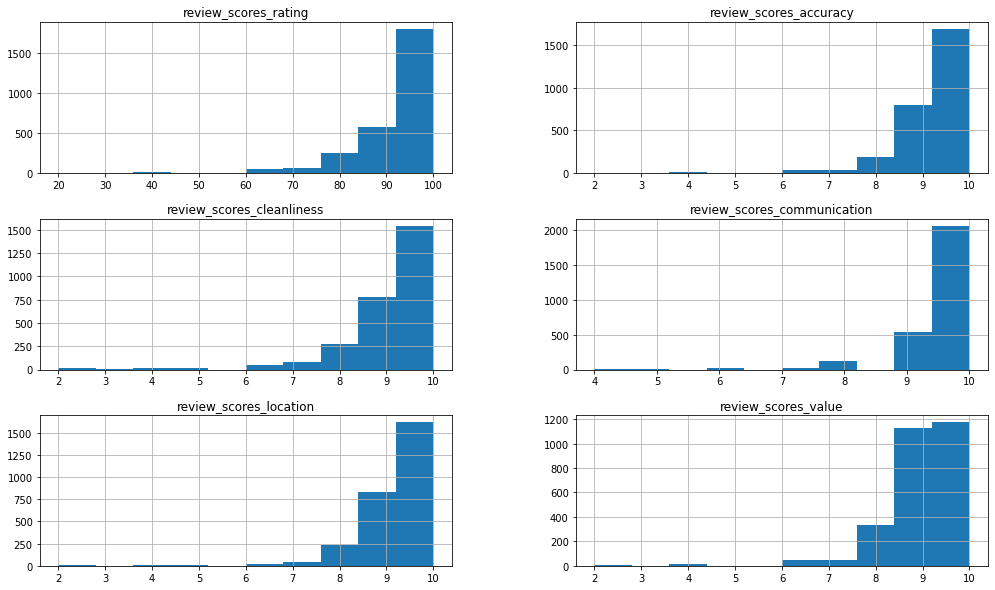

In [19]:
# Plot the histograms of review scores
listing_1.hist(bins = 10, column = ["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_communication", "review_scores_location", "review_scores_value"], figsize= (17, 10))
plt.show()

Text(0, 0.5, 'Price')

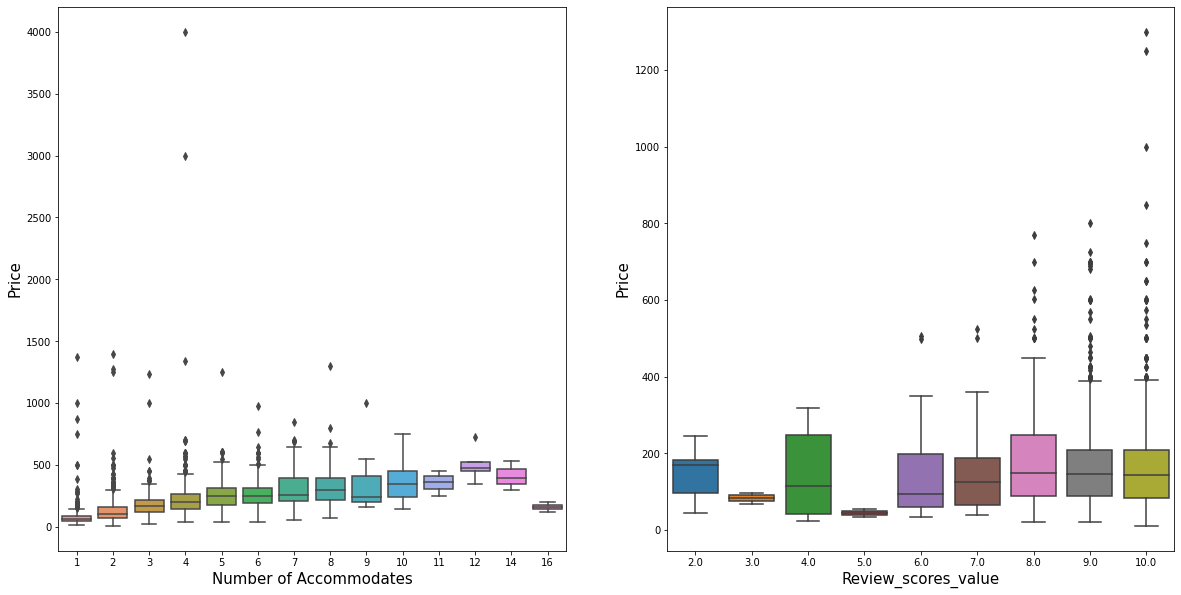

In [20]:
# Boxplots about accommodates and prices
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.boxplot(x="accommodates", y="price", data=listing_1)
plt.xlabel(xlabel="Number of Accommodates", fontsize=15)
plt.ylabel(ylabel="Price", fontsize=15)
 
# Boxplots about review_score_values and prices 
plt.subplot(1,2,2)
sns.boxplot(x="review_scores_value", y="price", data=listing_1)
plt.xlabel(xlabel="Review_scores_value", fontsize=15)
plt.ylabel(ylabel="Price", fontsize=15)

In [21]:
# Drop the outliers where prices are much higher than the median
price_hi  = listing_1["price"].quantile(0.999)
listing_2 = listing_1[listing_1["price"] < price_hi]

## Question 2: Consider the Correlations between Price and Other Features

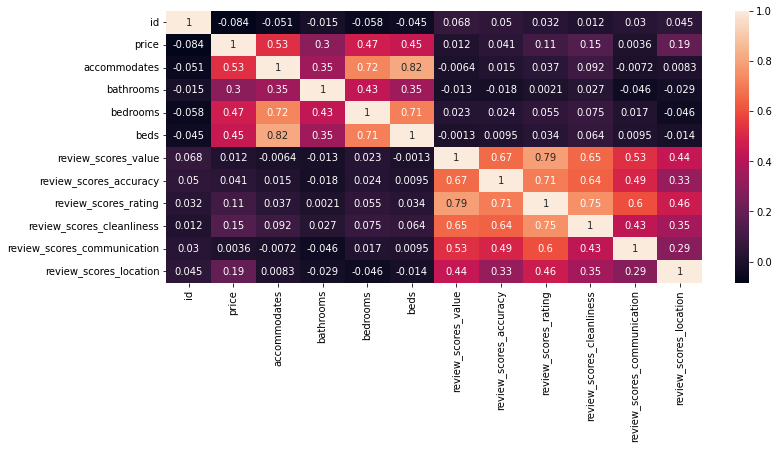

In [22]:
# Display the correlations
plt.figure(figsize=(12,5))
sns.heatmap(listing_2.corr(), annot=True)
plt.show()

## Question 3: Formulate a model to Predict Price using Linear Regression Algorithm

In [23]:
# Drop null values of listing_2dr
listing_2 = listing_2.reset_index()
listing_2dr = listing_2.dropna(axis = 0)

# The following features are the ones having high correlation with price
X = listing_2dr[["accommodates", "bathrooms", "bedrooms", "beds", "review_scores_location","review_scores_cleanliness"]]
y = listing_2dr["price"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

# Fit the train sets to Linear regression model
ln_model = LinearRegression(normalize = True)
ln_model.fit(X_train, y_train)

LinearRegression(normalize=True)

In [24]:
# Predict using the model
y_test_predict = ln_model.predict(X_test)

# Score using the model
r2_test = r2_score(y_test, y_test_predict)
length_y_test = len(y_test)
print("The r-squared score for your model was {} on {} values.".format(r2_test, length_y_test))

The r-squared score for your model was 0.4445081907373134 on 723 values.


In [25]:
# drop null values in review_df
review_df_drna = review_df.dropna(subset = ["comments"], axis = 0)

review_df_drna.head(10)

,listing_id,id,date,reviewer_id,reviewer_name,comments
8545,5506,1021,2009-03-21,8903,Jenny,Terry's Hotel Alterntv in Boston was a perfect...
27026,3353,1749,2009-04-23,12970,Clint,Very friendly and helpful. Convenient location.
8546,5506,1953,2009-05-01,12970,Clint,Warm and accommodating host. Beautiful and wel...
57563,6976,5808,2009-07-19,23549,Gary,"A Wonderful, pleasant, and charming host. The..."
20565,6695,6826,2009-08-06,25094,Jaelen,Terry's apartment is beautifully decorated and...
20566,6695,8063,2009-08-23,24420,Patrick,We stayed in the private home / condo. A nice ...
8547,5506,10089,2009-09-14,14033,Nicolas,We stay 3 nights at the Hotel Alternative and ...
20567,6695,10653,2009-09-19,34638,Kay,Terry's apartment has everything we needed. We...
3071,10730,10969,2009-09-21,38782,Alejandro,I went to Boston with my wife and my 7-month o...
3072,10730,12385,2009-10-04,39067,Erin,The location was perfect--right next to a T st...


## Question 4: Considering the Most Frequent n_grams in Review dataset's comments

In [26]:
# Get rid of punctuation (except periods!)
# Use regular expression to define the punctuation
punctuationNoPeriod = "[" + re.sub("\.","",string.punctuation) + "]" 
# Create punctuation dropping function
punc_dr = lambda text: (re.sub(punctuationNoPeriod, "", text))  
# Use the function
review_df_drna.comments = review_df_drna.comments.apply(punc_dr)

# Merge all values of comments_column as a corpus
corpus = ' '.join(review_df_drna.comments)
# Create English stop word set
sw_set = set(stopwords.words("english"))
# Split the words in corpus
tokenized = [w.lower() for w in corpus.split()]

# Get a list of all the mono-gram, Bigram
Monogram = tokenized
Bigram = ngrams(tokenized, 2)

# Get the frequency of each monogram/ Bigram in the corpus
Mono_Freq = dict(collections.Counter(Monogram))
Bi_Freq = dict(collections.Counter(Bigram))

# Filter the n_grams that are not in stop word set
Mono_Freq_no_sw = { k: v for k, v in Mono_Freq.items() if k not in sw_set}
Bi_Freq_no_sw = { k: v for k, v in Bi_Freq.items() if (k[0] not in sw_set) and (k[1] not in sw_set)}


In [27]:
# Create graph plotting function
def draw_graph(x):
    data_items = x.items()
    results_df = pd.DataFrame(list(data_items))
    results_df.columns = ["N_grams", "count"]
    results_df = results_df.sort_values(by = "count", ascending = False)
    results_df[:30].plot(kind = "barh",  y= "count", x = "N_grams", figsize = (10,10),)

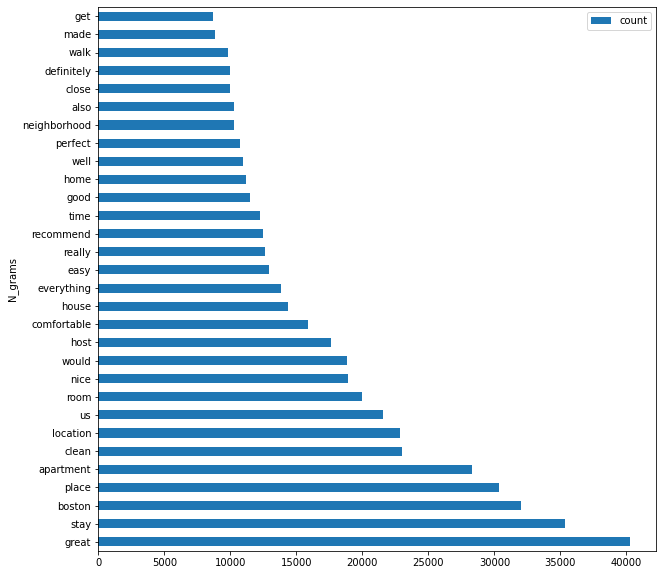

In [28]:
# Plot the top 30 frequent monogram
draw_graph(Mono_Freq_no_sw)

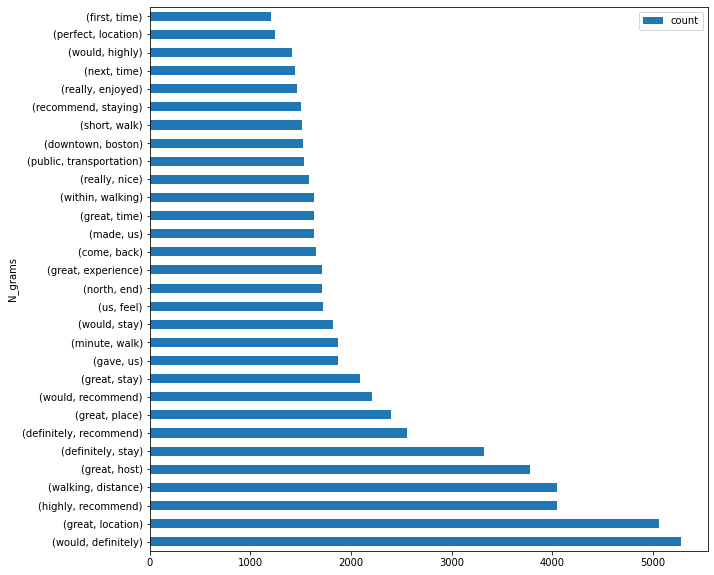

In [29]:
# Plot the top 30 frequent Bigram
draw_graph(Bi_Freq_no_sw)

## Question 5: Distribution of Price, Listing supply and Listing demand
#### Calendar dataset is used for prices and supply distribution and Review calendar is used for listing demand

### Calendar_df

In [30]:
# Column "month" is created to easily group by month
avail_calendar["month"] = avail_calendar["date"].dt.to_period("m")
avail_calendar.head(10)

,listing_id,date,available,price,month
365,3075044,2017-08-22,t,65,2017-08
366,3075044,2017-08-21,t,65,2017-08
367,3075044,2017-08-20,t,65,2017-08
368,3075044,2017-08-19,t,75,2017-08
369,3075044,2017-08-18,t,75,2017-08
370,3075044,2017-08-17,t,65,2017-08
371,3075044,2017-08-16,t,65,2017-08
372,3075044,2017-08-15,t,65,2017-08
373,3075044,2017-08-14,t,65,2017-08
374,3075044,2017-08-13,t,65,2017-08


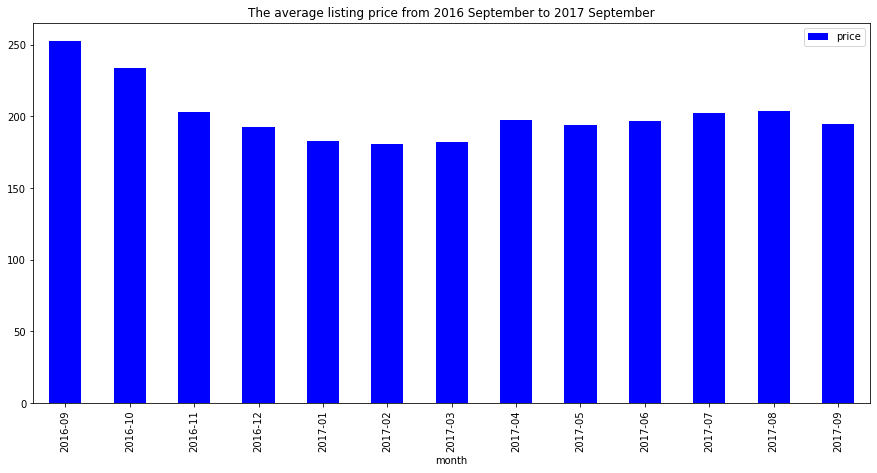

In [31]:
# How does price distribute thoughout a year?

# Group the data by month
avail_grouped = avail_calendar.groupby('month')

# Calculate the mean value of price in each group
df_month_price = pd.DataFrame(avail_grouped['price'].mean()).reset_index()

# Plot graph
df_month_price.plot.bar(x='month',y='price', title = "The average listing price from 2016 September to 2017 September", color='blue', figsize=(15,7))
plt.show()

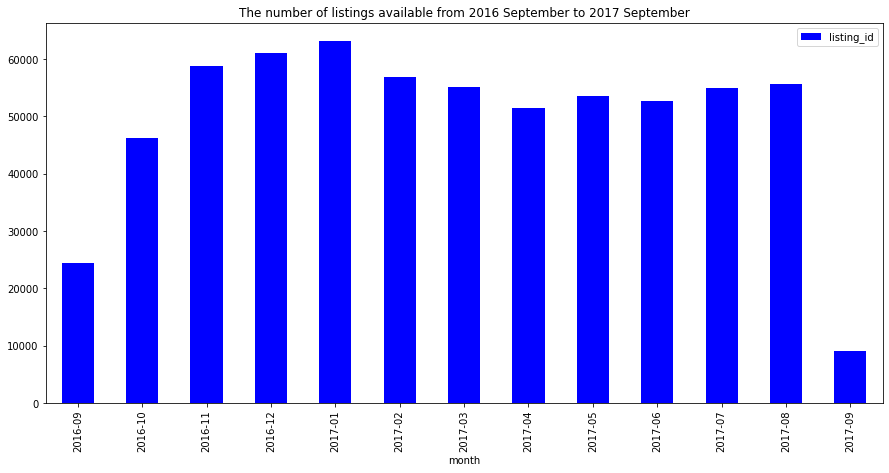

In [32]:
# How does supply distribute thoughout a year?

# Count the observations of each group
df_month_supply = pd.DataFrame(avail_grouped['listing_id'].count()).reset_index()

# Plot graph
df_month_supply.plot.bar(x= "month",color="blue", title = "The number of listings available from 2016 September to 2017 September", figsize=(15,7))
plt.show()

### Review_df

#### In the demand analyzing part, the number of review comments is assumped to be positively correlated to rental service uses.

In [33]:
# Column "month" is created to easily group by month
review_df["month"] = review_df["date"].dt.to_period("m")

In [34]:
# Consider the last 3-year data 
review_after20130906 = review_df[review_df.date > datetime.strptime("05/09/13", "%d/%m/%y")]
review_after20130906

,listing_id,id,date,reviewer_id,reviewer_name,comments,month
35770,916123,7091784,2013-09-06,5857886,Mike,North End Boston is the perfect location for s...,2013-09
38563,1173306,7089988,2013-09-06,8492099,Tommy,Cool little spot that I extended my stay in th...,2013-09
50098,815639,7105186,2013-09-06,6911089,Joyce,Fabulous location and arranging with the owner...,2013-09
17035,891661,7091980,2013-09-06,5685141,Krista,This small studio apartment was just the right...,2013-09
4837,749247,7109902,2013-09-06,7629467,Mike,Patti and Javier were incredibly welcoming and...,2013-09
...,...,...,...,...,...,...,...
20047,9117009,99953186,2016-09-06,82299688,Mindy,Gio has the BEST location for visiting the Nor...,2016-09
46457,7553969,99843875,2016-09-06,39235233,Bernadeta,"Location, location, location. The studio is lo...",2016-09
60437,8224214,99809473,2016-09-06,86587008,Charlotte,Andy was very responsive and flexible. The apa...,2016-09
50350,815639,99953506,2016-09-06,1935343,Jessica,Very charming place and neighborhood. Was clea...,2016-09


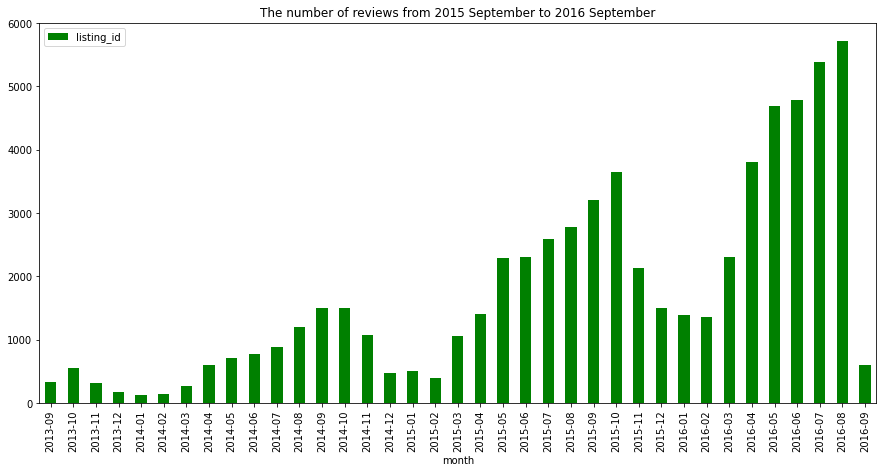

In [35]:
# Group the data by month
demand_grouped = review_after20130906.groupby('month')

# Count the observations of each group
df_month_demand = pd.DataFrame(demand_grouped['listing_id'].count()).reset_index()

# Plot graph
df_month_demand.plot.bar(x='month',color='green', title = "The number of reviews from 2015 September to 2016 September", figsize=(15,7))
plt.show()